In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil
import glob
import zipfile

In [26]:
import zipfile

def extract_zip(zip_file_path, extract_folder):
    print(f"Archive:  {zip_file_path}")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.infolist():
            print(f"  inflating: {member.filename}")
        zip_ref.extractall(extract_folder)

# Example usage
zip_file_path = "zipfile/archive.zip"  # Path to your zip file
extract_folder ='data' # Folder where you want to extract the files

# Unzip the file
extract_zip(zip_file_path, extract_folder)

print("Extraction completed.")


Archive:  zipfile/archive.zip
  inflating: data/test/infected/OIP.jpg
  inflating: data/test/infected/R.jpg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg
  inflating: data/test/infected/img1.jpg
  inflating: data/test/infected/img10.jpg
  inflating: data/test/infected/img2.jpg
  inflating: data/test/infected/img3.jpg
  inflating: data/test/infected/img4.jpg
  inflating: data/test/infected/img5.jpg
  inflating: data/test/infected/img6.jpg
  inflating: data/test/infected/img7.jpg
  inflating: data/test/infected/img8.jpg
  inflating: data/test/infected/img_0_1023.jpg
  inflating: data/test/infected/img_0_1033.jpg
  inflating: data/test/infected/img_0_1071.jpg
  inflating: data/test/infected/img_0_1075.jpg
  inflating: data/test/inf

In [27]:
ROOT_DIR = 'data/data/test'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])




 infected  787
 notinfected  1145


In [28]:
import tensorflow as tf
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
Keras version: 3.3.2


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [30]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [31]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

  


We will split the data such that 
70% for training 
15 % for vailadation
15 % for testing 



In [32]:
import os

In [33]:
import os
import numpy as np
import math
import shutil

def datafolder(path, split):
    if not os.path.exists("./" + path):
        os.mkdir("./" + path)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./" + path + "/" + dir)
            data = {}  # Assuming this is defined somewhere in your code
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                        size=(max(math.floor(split * number_of_images[dir]) - 5, 0)), replace=False):

                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./" + path, dir)
                shutil.copy(O, D)
                os.remove(O)

    else:
        print("Folder already exists")



In [34]:
datafolder("train1",0.7)

Folder already exists


In [35]:


# Print current working directory
print("Current Working Directory:", os.getcwd())

# Call datafolder function
datafolder("train1", 0.7)


Current Working Directory: c:\Users\bonyt\OneDrive\Desktop\image proj
Folder already exists


In [36]:
datafolder("val",0.15)

Folder already exists


In [37]:
datafolder("test",0.15)

Folder already exists


In [38]:
path ='train1'
train_data = preprocessingImage1(path)

Found 1334 images belonging to 2 classes.


In [39]:
path ='test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [40]:
path = 'val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.




Model Block




In [41]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [42]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

In [43]:
for layer in base_model.layers:
  layer.trainable = False

In [44]:
x= Flatten()(base_model.output)
x = Dense(units=1, activation='relu')(x)


In [45]:
model = Model(base_model.input,x)

In [46]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [47]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.keras",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [48]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [49]:
import scipy

In [50]:
hist = model.fit(train_data,
                           steps_per_epoch=2,
                           epochs=5,
                           validation_data=val_data,
                           validation_steps=5,
                          callbacks=cb)

Epoch 1/5


c:\Users\bonyt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.3516 - loss: 8.8368
Epoch 1: val_accuracy improved from -inf to 0.64375, saving model to bestmodel.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3854 - loss: 8.4639 - val_accuracy: 0.6438 - val_loss: 5.6795
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5547 - loss: 7.0993
Epoch 2: val_accuracy did not improve from 0.64375
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5625 - loss: 6.9748 - val_accuracy: 0.5763 - val_loss: 6.7552
Epoch 3/5


c:\Users\bonyt\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.5469 - loss: 7.2239
Epoch 3: val_accuracy did not improve from 0.64375
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5625 - loss: 6.9748 - val_accuracy: 0.6375 - val_loss: 5.7791
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.5781 - loss: 6.7257
Epoch 4: val_accuracy did not improve from 0.64375
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5938 - loss: 6.4766 - val_accuracy: 0.5593 - val_loss: 7.0255
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5234 - loss: 7.5975
Epoch 5: val_accuracy did not improve from 0.64375
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5312 - loss: 7.4730 - val_accuracy: 0.6187 - val_loss: 6.0780


In [51]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,329,220 (12.70 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 50,179 (196.02 KB)

In [52]:
model.save("bestmodel.h5")

In [53]:
#load from here

In [54]:
from keras.models import load_model

In [55]:
model = load_model("bestmodel.h5")

In [56]:
from keras.models import model_from_json

# Assuming you have a Keras model named 'model'

# Convert model to JSON format
model_json = model.to_json()

# Write model JSON to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [57]:
# Load JSON file
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Load model from JSON
loaded_model = model_from_json(loaded_model_json)

# Now, the 'loaded_model' variable contains your model loaded from the JSON file


In [58]:
path ='train1'
train_data = preprocessingImage1(path)

Found 1334 images belonging to 2 classes.


In [59]:
acc = model.evaluate(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.5803 - loss: 6.6913
our model accuracy is  59.712231159210205 %


In [60]:
acc = model.evaluate(test_data)[1]  # Assuming `test_data` is your test dataset
print(f"Our model accuracy is {acc * 100}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.6419 - loss: 5.7091
Our model accuracy is 59.712231159210205%


In [61]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


 Our model is perform well on the datasets.

The accuracy is 100.0 %

In [62]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [63]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [64]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [65]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [73]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def predictimage(path):
       
      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print(" Not Affected")
      else:
          print(" Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 Affected


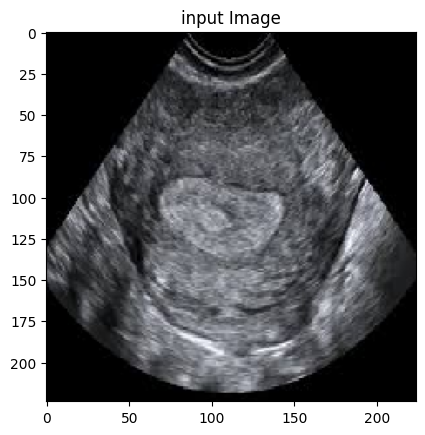

In [74]:
#It is the not affected sample images
predictimage("C:/Users/bonyt/OneDrive/Desktop/exec_img/images.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 Affected


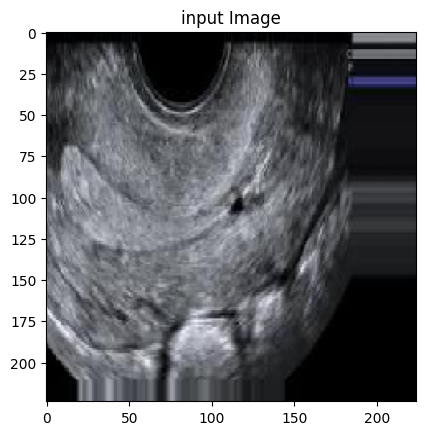

In [75]:
#not infected image

predictimage(r"C:/Users/bonyt/OneDrive/Desktop/image proj/data/data/train/notinfected/img_0_4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 Affected


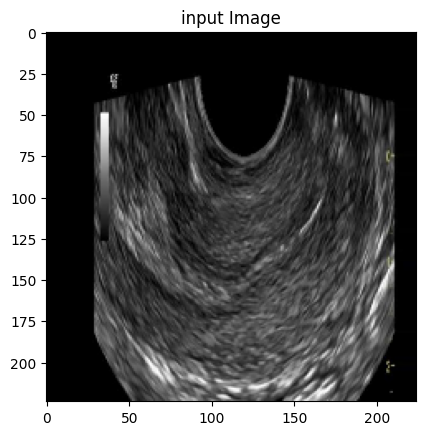

In [76]:
predictimage("C:/Users/bonyt/OneDrive/Desktop/image proj/data/data/train/notinfected/img_0_393.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 Affected


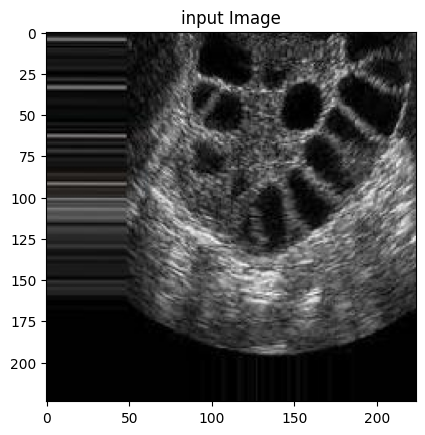

In [77]:
predictimage(r"C:/Users/bonyt/OneDrive/Desktop/exec_img/a_img2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 Affected


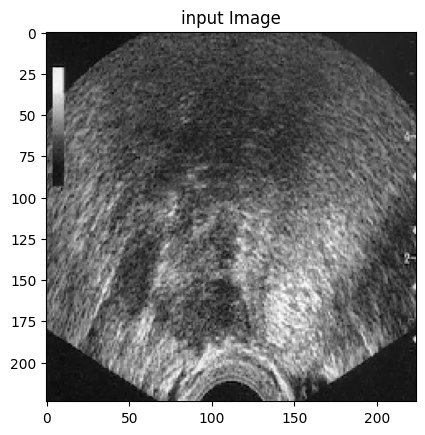

In [78]:
predictimage(r"c:/Users/bonyt/OneDrive/Desktop/exec_img/01APATNU.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 Affected


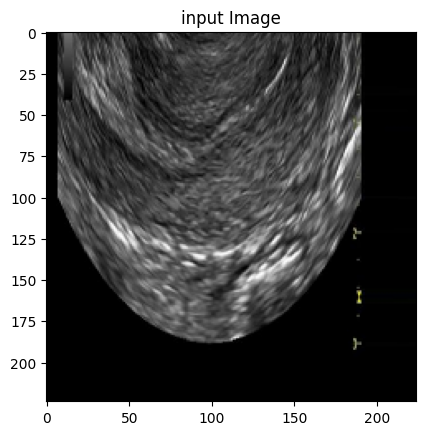

In [79]:
predictimage(r"C:/Users/bonyt/OneDrive/Desktop/exec_img/na_img6.jpg")